# Figure 11 for corrigendum to 2016 JAMES Tracmip introduction paper

Data is taken from ESGF copy of TRACMIP at KIT SCC LSDFONLINE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle

# my module functions to load tracmip data, plot colors, model names etc.
import tracmip as tm

import warnings
warnings.filterwarnings("ignore")

## Load precipitation

In [2]:
pr_aqct = 86400*np.array(np.load('./postdata_npz/pr_aquaControlTRACMIP.timmean.npz')['pr'])
pr_ldct = 86400*np.array(np.load('./postdata_npz/pr_landControlTRACMIP.timmean.npz')['pr'])

## Calculate ITCZ position

In [3]:
import sys
sys.path.append('/home/fd8940/Dropbox/Python3/mymodules')
import atmosphere as atm

In [4]:
# model median
itcz_aqct_mm = np.zeros(tm.nlonint) + np.nan
itcz_ldct_mm = np.zeros(tm.nlonint) + np.nan
for i in range(0, tm.nlonint):
    itcz_aqct_mm[i] = atm.get_itczposition(np.nanmedian(pr_aqct[tm.modlist_ldct, :, i], axis=0), tm.latint, 30.0, 0.1)
    itcz_ldct_mm[i] = atm.get_itczposition(np.nanmedian(pr_ldct[tm.modlist_ldct, :, i], axis=0), tm.latint, 30.0, 0.1)

# individual models    
itcz_aqct = np.zeros((tm.nmod, tm.nlonint)) + np.nan
itcz_ldct = np.zeros((tm.nmod, tm.nlonint)) + np.nan
for m in range(0, tm.nmod):
    for i in range(0, tm.nlonint):
        itcz_aqct[m,i] = atm.get_itczposition(pr_aqct[m, :, i], tm.latint, 30.0, 0.1)
        itcz_ldct[m,i] = atm.get_itczposition(pr_ldct[m, :, i], tm.latint, 30.0, 0.1)    

## Plotting

In [5]:
def make_niceplot(ax, modelname):
    ax.xaxis.set_ticks([-120, -60, 0, 60, 120])
    ax.xaxis.set_ticklabels([''], fontsize=11)
    ax.yaxis.set_ticks([-0.866, -0.5, 0, 0.5, 0.866])
    ax.yaxis.set_ticklabels([''], fontsize=11) 
    plt.text(0.03, 0.93, modelname, fontsize=15, ha='left', va='center', \
             transform=ax.transAxes, backgroundcolor='white')
    plt.xlim(-175, 175), plt.ylim(-0.6, 0.6)  

In [6]:
sinlat = np.sin(tm.latint*np.pi/180)

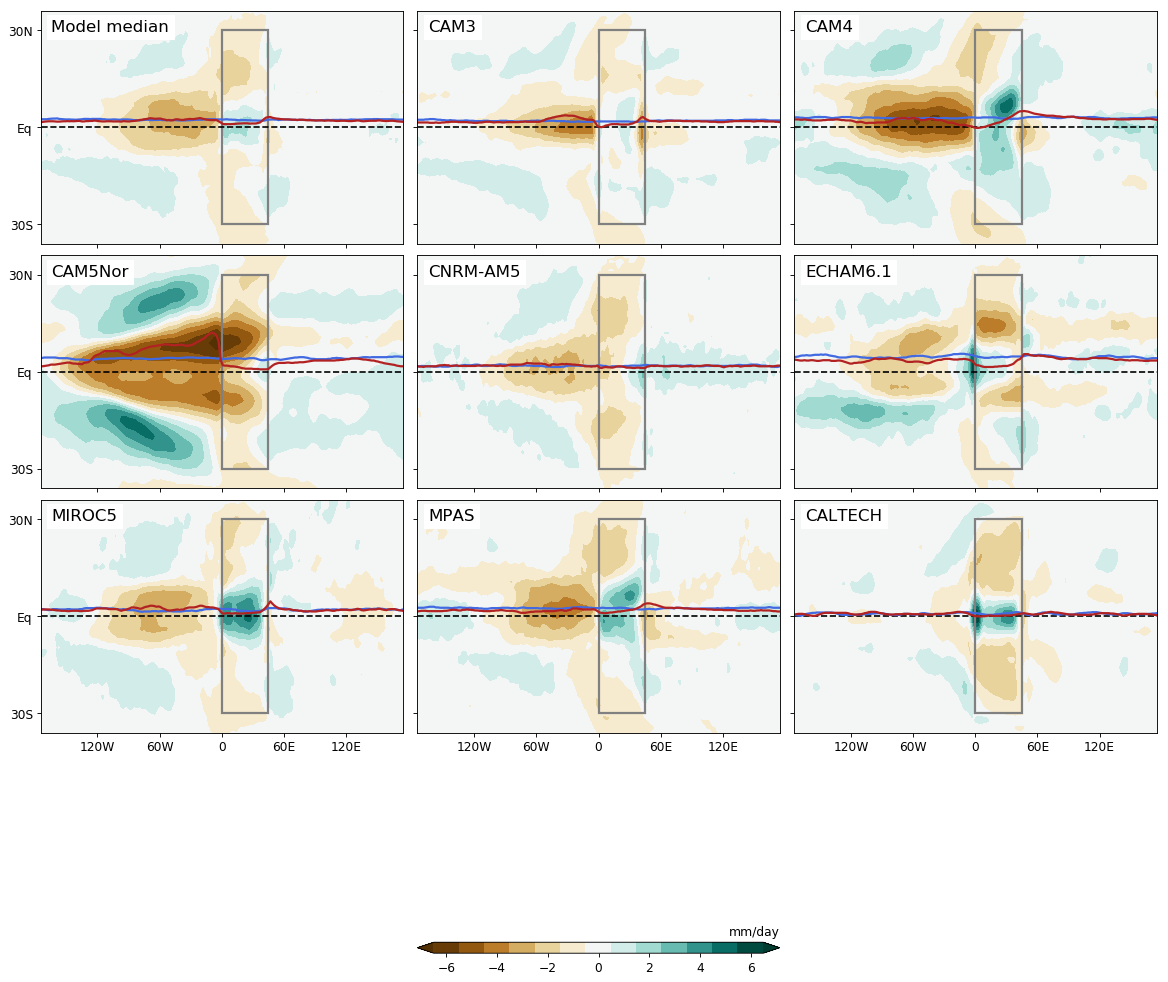

In [7]:
plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k' )
clev = np.array([-6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

ax = plt.subplot(4, 3, 1)
c = plt.contourf(tm.lonint, sinlat, np.nanmedian((pr_ldct-pr_aqct)[tm.modlist_ldct], axis=0), clev, extend='both', cmap=cm.BrBG)
plt.plot(tm.lonint, np.sin(np.nanmedian(itcz_aqct[tm.modlist_ldct], axis=0)*np.pi/180), 'royalblue', linewidth=2)
plt.plot(tm.lonint, np.sin(np.nanmedian(itcz_ldct[tm.modlist_ldct], axis=0)*np.pi/180), 'firebrick', linewidth=2)
ax.add_patch(Rectangle((0, -0.5), 45, 1, alpha=1, facecolor='none', edgecolor='gray', linewidth=2))
plt.plot([-200, 200], [0, 0], 'k--')
make_niceplot(ax, 'Model median')
ax.yaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=11) 

ax = plt.subplot(4, 3, 11)
ax.axis('off')
cbar = plt.colorbar(c, ticks=[-6, -4, -2, 0, 2, 4, 6], orientation='horizontal', aspect=30)
cbar.ax.tick_params(labelsize=11)
plt.text(1, -0.17, 'mm/day', fontsize=11, ha='right')  

for m in tm.modlist_ldct:
    if tm.modnames[m] == 'CAM3'     : msubplot = 2 
    if tm.modnames[m] == 'CAM4'     : msubplot = 3 
    if tm.modnames[m] == 'CAM5Nor'  : msubplot = 4
    if tm.modnames[m] == 'CNRM-AM5' : msubplot = 5 
    if tm.modnames[m] == 'ECHAM61' : msubplot = 6
    if tm.modnames[m] == 'MIROC5'   : msubplot = 7  
    if tm.modnames[m] == 'MPAS'     : msubplot = 8
    if tm.modnames[m] == 'CALTECH'  : msubplot = 9
    ax = plt.subplot(4, 3, msubplot)
    c = plt.contourf(tm.lonint, sinlat, (pr_ldct-pr_aqct)[m, :, :], clev, extend='both', cmap=cm.BrBG)
    ax.add_patch(Rectangle((0, -0.5), 45, 1, alpha=1, facecolor='none', edgecolor='gray', linewidth=2))
    plt.plot([-200, 200], [0, 0], 'k--')
    plt.plot(tm.lonint, np.sin(itcz_aqct[m, :]*np.pi/180), 'royalblue', linewidth=2)
    plt.plot(tm.lonint, np.sin(itcz_ldct[m, :]*np.pi/180), 'firebrick', linewidth=2)    
    make_niceplot(ax, tm.modnames_4plots[m])
    if (msubplot == 7) or (msubplot == 8) or (msubplot == 9):
        ax.xaxis.set_ticklabels(['120W', '60W', '0', '60E', '120E'], fontsize=11) 
    if msubplot in [1, 4, 7]:
        ax.yaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=11)

plt.subplots_adjust(wspace=0.04, hspace=0.05) 

plt.tight_layout
plt.savefig('figs/corrigendumpaper_figure11.pdf')